In [1]:
import numpy as np
import pandas as pd
import h5py
import sys
import matplotlib.pyplot as plt
from statistics import mean
from scipy.optimize import curve_fit

sys.path.insert(0, './radiometric')
from LUT_functions import pixel_registration, create_LUT_df
import scipy

# Seaborn for plotting and styling
import seaborn as sns
sns.set_theme()
sns.set_style("whitegrid", {'axes.grid' : False})

In [2]:
#choose filepath to desired data
path = '/Users/kirahart/Dropbox/GitHub/IRCSP2_data/calibration_data/LUT/'
cal_file1 =  "/Users/kirahart/Dropbox/GitHub/IRCSP2_data/calibration_files/cam1pixel.h5"
cal_file2 =  "/Users/kirahart/Dropbox/GitHub/IRCSP2_data/calibration_files/cam2pixel.h5"

In [3]:
#will create a df and print the names of the keys in the original hdf5 file
df1 = create_LUT_df(path,'cam1_80.h5')
df2 = create_LUT_df(path,'cam2_80.h5')

In [4]:
waves= np.linspace(7,12,61)
temps = [25,30,35,40,45,50,55,60,70,75,80]
angles = np.round(np.linspace(-7.07,7.07,35),1)

In [5]:
#import nuc calibration
sys.path.insert(0, './NUC')
from NUC_functions import import_NUC, apply_NUC
cal_path = '/Users/kirahart/Dropbox/GitHub/IRCSP2_data/calibration_files/NUC.h5'

m1,b1,T_ref1,m2,b2,T_ref2 = import_NUC(cal_path)

In [6]:
#apply pixel registration and NUC to full dataset

ymin1 = 105; ymax1 = 140;
ymin2 = 130; ymax2 = 165;

mean_ims1 =[]
mean_ims2 =[]
std_ims1  =[]
std_ims2  =[]

mean_ims1n =[]
mean_ims2n =[]
std_ims1n  =[]
std_ims2n  =[]

for i in temps:
    #will create a df and print the names of the keys in the original hdf5 file
    df1 = create_LUT_df(path,'cam1_'+str(i)+'.h5')
    df2 = create_LUT_df(path,'cam2_'+str(i)+'.h5')
    
    corrected_images1= [] ; corrected_images1n= [];
    corrected_images2= [] ; corrected_images2n= []

    for i in range(len(df1)):
        #first without NUC correction
        r = df1['images1'][i];
        c = pixel_registration(r,cal_file1,waves,ymin1,ymax1)
        
        #now with NUC correction
        T = df1['temp1'][i];
        rn = apply_NUC(r,T,m1,b1,T_ref1)
        cn = pixel_registration(rn,cal_file1,waves,ymin1,ymax1)
        
        corrected_images1.append(c)
        corrected_images1n.append(cn)

    for i in range(len(df2)):
        #first without NUC correction
        r = df2['images1'][i];
        c = pixel_registration(r,cal_file2,waves,ymin2,ymax2)
        
        #now with NUC correction
        T = df2['temp1'][i];
        rn = apply_NUC(r,T,m2,b2,T_ref2)
        cn = pixel_registration(rn,cal_file2,waves,ymin2,ymax2)
        
        corrected_images2.append(c)
        corrected_images2n.append(cn)

    mean_ims1.append(np.mean(corrected_images1,axis = 0))
    mean_ims1n.append(np.mean(corrected_images1n,axis = 0))
    mean_ims2.append(np.mean(corrected_images2,axis = 0))
    mean_ims2n.append(np.mean(corrected_images2n,axis = 0))


    std_ims1.append(np.std(corrected_images1,axis = 0))
    std_ims2.append(np.std(corrected_images2,axis = 0))
    std_ims1n.append(np.std(corrected_images1n,axis = 0))
    std_ims2n.append(np.std(corrected_images2n,axis = 0))

In [7]:
d = {'BB_temps': temps, 'ims1': list(mean_ims1),'s1': list(std_ims1), 'ims2':list(mean_ims2),'s2': list(std_ims2)}
dn = {'BB_temps': temps, 'ims1': list(mean_ims1n),'s1': list(std_ims1n), 'ims2':list(mean_ims2n),'s2': list(std_ims2n)}


In [8]:
df = pd.DataFrame.from_dict(d, orient='index')
df = df.transpose()

dfn = pd.DataFrame.from_dict(dn, orient='index')
dfn = dfn.transpose()

dfn

,BB_temps,ims1,s1,ims2,s2
0,25,"[[23018.460867393285, 23020.63139065816, 23031...","[[2.096237552367885, 2.5600498109448337, 2.004...","[[22492.816533073586, 22498.21890840285, 22496...","[[10.843821685185976, 10.129074232456219, 10.4..."
1,30,"[[23028.433774629473, 23034.57527005634, 23042...","[[1.4747362002333415, 1.8489296823434844, 1.43...","[[22491.86850160839, 22497.96779093427, 22495....","[[4.349049414311956, 4.402235397107074, 4.7449..."
2,35,"[[23028.371085321247, 23034.879191134292, 2304...","[[4.1279829514421165, 5.699641770055133, 4.227...","[[22503.688006984703, 22507.094253856587, 2250...","[[10.883970760693924, 8.149855391656958, 8.080..."
3,40,"[[23026.561249404942, 23032.10978181234, 23038...","[[6.88527600282132, 6.80939087626284, 4.252431...","[[22495.645899281422, 22497.71065956465, 22499...","[[6.7506434954919134, 5.896568135470383, 5.432..."
4,45,"[[23019.757629209187, 23024.3014437999, 23032....","[[2.812308696767277, 3.1560635403224837, 2.659...","[[22520.960322831535, 22521.768678600918, 2252...","[[10.342928493959924, 8.967663077656129, 7.900..."
5,50,"[[23036.225274262997, 23046.530891653412, 2304...","[[4.807040503106908, 5.329601004216688, 5.6999...","[[22513.79, 22511.0, 22510.795, 22519.71, 2252...","[[5.1580907320441725, 6.069596362197408, 5.928..."
6,55,"[[23046.299764359355, 23052.650356414357, 2306...","[[6.44993819600214, 5.816646549048909, 7.29652...","[[22545.377984520626, 22547.08185853748, 22547...","[[16.256091733208926, 16.776601321739513, 16.4..."
7,60,"[[23034.43109106532, 23034.616474309507, 23051...","[[15.121969986478808, 8.011107262382351, 15.79...","[[22540.195, 22543.335, 22544.31, 22549.105, 2...","[[6.229725114320852, 6.755388589859212, 6.2059..."
8,70,"[[21122.265637945082, 21114.315416686502, 2302...","[[1474.8105546983306, 1478.35077863994, 6.1345...","[[22537.364978385725, 22544.661277963, 22548.9...","[[7.165982161332885, 7.438468305402791, 8.6630..."
9,75,"[[23058.946188322396, 23048.368174592397, 2301...","[[11.665848885721855, 10.919103819001148, 10.8...","[[22574.574086824643, 22581.665720158024, 2258...","[[8.03034176046763, 8.567571967074652, 8.37746..."


In [9]:

df.to_hdf('/Users/kirahart/Dropbox/GitHub/IRCSP2_data/calibration_data/LUT/df_no_NUC.h5', key='s')
dfn.to_hdf('/Users/kirahart/Dropbox/GitHub/IRCSP2_data/calibration_data/LUT/df_NUC.h5', key='s')


/Users/kirahart/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:2434: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block0_values] [items->Index(['BB_temps', 'ims1', 's1', 'ims2', 's2'], dtype='object')]

  pytables.to_hdf(


In [10]:
def finv(y,A,B):
    return ((y-B)/A)**0.5


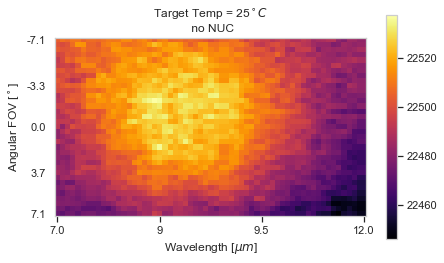

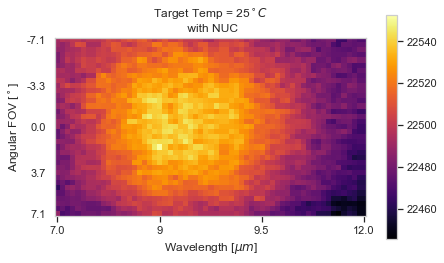

In [11]:
cmin = np.min(list(df['ims1'])); cmax=np.max(list(df['ims2']))

j = 0;
plt.matshow(df['ims2'][j],cmap = 'inferno' )
plt.colorbar()
plt.ylabel('Angular FOV [$^\circ$]')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.yticks([0, 9,17,26,34], [angles[0], angles[9],angles[17],angles[26],angles[34]])
plt.title('Target Temp = ' + str(temps[j])+ '$^\circ C$ \n no NUC')
#plt.clim(cmin,cmax)
plt.show()

cmin = np.min(list(dfn['ims1'])); cmax=np.max(list(df['ims2']))

plt.matshow(dfn['ims2'][j],cmap = 'inferno' )
plt.colorbar()
plt.ylabel('Angular FOV [$^\circ$]')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.yticks([0, 9,17,26,34], [angles[0], angles[9],angles[17],angles[26],angles[34]])
plt.title('Target Temp = ' + str(temps[j])+ '$^\circ C$ \n with NUC')
plt.show()

In [12]:
#create sum column
df["totalrad"] = df['ims2']+df['ims1']
df["totalstd"] = (df['s2']**2+df['s1']**2)**0.5

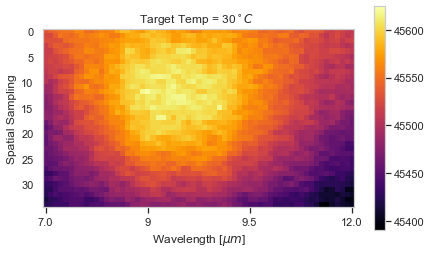

In [13]:
cmin = np.min(list(df['totalrad'])); cmax=np.max(list(df['totalrad']))

j = 1;
plt.matshow(df['totalrad'][j],cmap = 'inferno' )
plt.colorbar()
plt.ylabel('Spatial Sampling')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.title('Target Temp = ' + str(temps[j])+ '$^\circ C$  ')
#plt.clim(cmin,cmax)
plt.show()

In [14]:
# pixel fit 
def f(x, A, B): # this is your 'straight line' y=f(x)
    return A*x**2 + B

def finv(y,A,B):
    return ((y-B)/A)**0.5


In [15]:
x = 30
plt.errorbar(df['BB_temps'],get_slice_avg(df['ims2'],x),yerr=get_slice_avg(df['s1'],x),label = 'no NUC')
plt.errorbar(dfn['BB_temps'],get_slice_avg(dfn['ims2'],x),yerr=get_slice_avg(dfn['s1'],x),label = 'with NUC')
plt.title('spatially averaged response \n $\lambda = $' + str(round(waves[x],2)) + ' $  \mu m$')
plt.xlabel('Scene Temperature [$^\circ C$ ] ')
plt.ylabel('avg camera count')
plt.legend()
plt.show()


NameError: name 'get_slice_avg' is not defined

In [ ]:
def get_slice(df,x,y):
    sli = []
    for i in range(len(df)):
        s = df[i]
        sli.append(s[y,x])
    return(sli)

def get_slice_avg(df,x):
    sli = []
    for i in range(len(df)):
        s = df[i]
        sli.append(np.mean(s[:,x]))
    return(sli)

In [ ]:

def calc_rad_coef(db):
    '''do pixel by pixel fit and determine A and B coefficients'''
    spec = len(db['ims1'][1][1])
    spat = len(db['ims1'][1])
    Ts = df['BB_temps'];
    
    #preallocate coefficient arrays
    A1 = np.zeros([spat,spec]);B1 = np.zeros([spat,spec]);
    A2 = np.zeros([spat,spec]);B2 = np.zeros([spat,spec]);
    At = np.zeros([spat,spec]);Bt = np.zeros([spat,spec]);
    
    for i in range(spat):
        for j in range(spec):
            rs1 = get_slice(db['ims1'],j,i)
            rs2 = get_slice(db['ims2'],j,i)
            [a1,b1],cov1 = curve_fit(f, Ts, rs1)
            [a2,b2],cov2 = curve_fit(f, Ts, rs2)
            [at,bt],covt = curve_fit(f, Ts, np.add(rs1,rs2))
            A1[i,j] = a1;B1[i,j] =b1
            A2[i,j] = a2;B2[i,j] =b2
            At[i,j] = at;Bt[i,j] =bt
    return([A1,B1],[A2,B2],[At,Bt])        
 

In [ ]:
[A1,B1],[A2,B2],[At,Bt] = calc_rad_coef(df)

In [ ]:
[A1n,B1n],[A2n,B2n],[Atn,Btn] = calc_rad_coef(dfn)

In [ ]:
plt.matshow(B2)
plt.colorbar()

In [ ]:
#writetohdf5

#choose filepath to desired data
save_path =   '/Users/kirahart/Dropbox/GitHub/IRCSP2_data/calibration_files/'
name =  "LUT" 

#create hdf5 file
hf = h5py.File(save_path + name + '.h5', 'w')
hf.create_dataset('/A1',  data= A1)
hf.create_dataset('/B1',  data= B1)
hf.create_dataset('/A2',  data= A2)
hf.create_dataset('/B2',  data= B2)
hf.create_dataset('/At',  data= At)
hf.create_dataset('/Bt',  data= Bt)

hf.create_dataset('/A1n',  data= A1n)
hf.create_dataset('/B1n',  data= B1n)
hf.create_dataset('/A2n',  data= A2n)
hf.create_dataset('/B2n',  data= B2n)
hf.create_dataset('/Atn',  data= Atn)
hf.create_dataset('/Btn',  data= Btn)
hf.close()

In [ ]:
def radiometric_retrieval(df,j,At,Bt):
    #attempt retrival
    Ts= np.zeros([35,len(waves)])
    for w in range(len(waves)):
        for s in range(35):
            data= list(df['ims1'][j]+df['ims2'][j])[s][w]
            A = At[s][w]
            B = Bt[s][w]
            t = finv(data,A,B)
            Ts[s][w] = t
    return(Ts)        

In [ ]:
j =3;
Ts = radiometric_retrieval(df,j,At,Bt) 


plt.matshow(Ts,cmap = 'inferno' )
cbar = plt.colorbar()
cbar.set_label('retrieved T [$^\circ C$]\n', rotation=-90, va="bottom")
plt.ylabel('Angular FOV [$^\circ$]')
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.yticks([0, 9,17,26,34], [angles[0], angles[9],angles[17],angles[26],angles[34]])
plt.title('Target Temp = ' + str(temps[j])+ '$^\circ C$')
plt.clim(0,temps[j]+5)
plt.show()

plt.matshow(Ts-temps[j],cmap = 'bwr' )
cbar = plt.colorbar()
cbar.set_label('Error [$^\circ C$]\n', rotation=-90, va="bottom")
plt.ylabel('Angular FOV [$^\circ$]') 
plt.xlabel('Wavelength [$\mu m$]')
plt.ax = plt.gca()
plt.ax.xaxis.set_ticks_position('bottom')
plt.xticks([0, 20, 40,60], [waves[0],round(waves[20]),waves[30],waves[60]])
plt.yticks([0, 9,17,26,34], [angles[0], angles[9],angles[17],angles[26],angles[34]])
plt.title('Retreival Error for T = ' + str(temps[j])+ '$^\circ C$')
plt.clim(-10,10)
plt.show()

In [ ]:
path = '/Users/kirahart/Dropbox/GitHub/IRCSP2_data/Cal_target_analysis/dec16/'

df1 = create_LUT_df(path,'cam1_center.h5')
df2 = create_LUT_df(path,'cam2_center.h5')

In [ ]:
df1